In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import gzip
import model
from torch.utils import data
import torch
import torch.optim as optim
from torch.autograd import Variable
from time import gmtime, strftime
import sys
import torch.nn as nn
from tqdm import tqdm

In [2]:
# %load model.py
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils import data
import gzip
import sys
import torch.optim as optim
conv2d1_filters_numbers = 8
conv2d1_filters_size = 9
conv2d2_filters_numbers = 8
conv2d2_filters_size = 1
conv2d3_filters_numbers = 1
conv2d3_filters_size = 5

class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, conv2d1_filters_numbers, conv2d1_filters_size)
        self.conv2 = nn.Conv2d(conv2d1_filters_numbers, conv2d2_filters_numbers, conv2d2_filters_size)
        self.conv3 = nn.Conv2d(conv2d2_filters_numbers, 1, conv2d3_filters_size)

    def forward(self, x):
        print("start forwardingf")
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        return x
'''
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
'''
'''
net = Net(40, 24)



#sys.exit()
#low_resolution_samples = low_resolution_samples.reshape((low_resolution_samples.shape[0], 40, 40))
#print low_resolution_samples[0:1, :,: ,: ].shape
#low_resolution_samples = torch.from_numpy(low_resolution_samples[0:1, :,: ,: ])
#X = Variable(low_resolution_samples)
#print X
#Y = Variable(torch.from_numpy(Y[0]))
#X = Variable(torch.randn(1, 1, 40, 40))
#print X
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
criterion = nn.MSELoss()
for epoch in range(2):  # loop over the dataset multiple times
    print "epoch", epoch

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        #print(inputs.size())
        #print(labels.size())
        #print type(inputs)

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print outputs
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        print i
        # print statistics
        #print type(loss)
        #print loss
        #print loss.data[0]
        #print loss.data
        #print type(data), len(data)
        #print "the key is ", type(data[0])
        


print('Finished Training')


output = net(X)
print(output)
print type(output)

loss = criterion(output, Y)


net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.weight.grad)

'''



'\nnet = Net(40, 24)\n\n\n\n#sys.exit()\n#low_resolution_samples = low_resolution_samples.reshape((low_resolution_samples.shape[0], 40, 40))\n#print low_resolution_samples[0:1, :,: ,: ].shape\n#low_resolution_samples = torch.from_numpy(low_resolution_samples[0:1, :,: ,: ])\n#X = Variable(low_resolution_samples)\n#print X\n#Y = Variable(torch.from_numpy(Y[0]))\n#X = Variable(torch.randn(1, 1, 40, 40))\n#print X\noptimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)\ncriterion = nn.MSELoss()\nfor epoch in range(2):  # loop over the dataset multiple times\n    print "epoch", epoch\n\n    running_loss = 0.0\n    for i, data in enumerate(train_loader, 0):\n        # get the inputs\n        inputs, labels = data\n        #print(inputs.size())\n        #print(labels.size())\n        #print type(inputs)\n\n        # wrap them in Variable\n        inputs, labels = Variable(inputs), Variable(labels)\n\n        # zero the parameter gradients\n        optimizer.zero_grad()\n\n        # 

In [3]:
use_gpu = 0

conv2d1_filters_numbers = 8
conv2d1_filters_size = 9
conv2d2_filters_numbers = 8
conv2d2_filters_size = 1
conv2d3_filters_numbers = 1
conv2d3_filters_size = 5


down_sample_ratio = 16
epochs = 10
HiC_max_value = 100
batch_size = 256



In [ ]:
# This block is the actual training data used in the training. The training data is too large to put on Github, so only toy data is used. 
# cell = "GM12878_replicate"
# chrN_range1 = '1_8'
# chrN_range = '1_8'

# low_resolution_samples = np.load(gzip.GzipFile('/home/zhangyan/SRHiC_samples/'+cell+'down16_chr'+chrN_range+'.npy.gz', "r")).astype(np.float32) * down_sample_ratio
# high_resolution_samples = np.load(gzip.GzipFile('/home/zhangyan/SRHiC_samples/original10k/'+cell+'_original_chr'+chrN_range+'.npy.gz', "r")).astype(np.float32)

# low_resolution_samples = np.minimum(HiC_max_value, low_resolution_samples)
# high_resolution_samples = np.minimum(HiC_max_value, high_resolution_samples)


low_resolution_samples = np.load(gzip.GzipFile('HiCPlus/data/GM12878_replicate_down16_chr19_22.npy.gz', "r")).astype(np.float32) * down_sample_ratio
high_resolution_samples = np.load(gzip.GzipFile('HiCPlus/data/GM12878_replicate_original_chr19_22.npy.gz', "r")).astype(np.float32)

#low_resolution_samples = np.load(gzip.GzipFile('/home/zhangyan/SRHiC_samples/IMR90_down_HINDIII16_chr1_8.npy.gz', "r")).astype(np.float32) * down_sample_ratio
#high_resolution_samples = np.load(gzip.GzipFile('/home/zhangyan/SRHiC_samples/original10k/_IMR90_HindIII_original_chr1_8.npy.gz', "r")).astype(np.float32)


low_resolution_samples = np.minimum(HiC_max_value, low_resolution_samples)
high_resolution_samples = np.minimum(HiC_max_value, high_resolution_samples)



# Reshape the high-quality Hi-C sample as the target value of the training. 
sample_size = low_resolution_samples.shape[-1]
padding = conv2d1_filters_size + conv2d2_filters_size + conv2d3_filters_size - 3
half_padding = int(padding / 2)
output_length = sample_size - padding
Y = []

In [ ]:
plt.imshow(high_resolution_samples[1][0][0:10, 0:10], interpolation='nearest')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
print(high_resolution_samples.shape)
high_resolution_samples.reshape(360, 360)
#print(high_resolution_samples.shape[0])
for i in range(high_resolution_samples.shape[0]):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(high_resolution_samples[i][0], interpolation='nearest')
    plt.subplot(1,2,2)
    plt.imshow(low_resolution_samples[i][0], interpolation='nearest')
    plt.show()
    if i > 10 :
        break

In [ ]:
for i in range(high_resolution_samples.shape[0]):
    no_padding_sample = high_resolution_samples[i][0][half_padding:(sample_size-half_padding), half_padding:(sample_size - half_padding)]
    Y.append(no_padding_sample)
Y = np.array(Y).astype(np.float32)

print(low_resolution_samples.shape, Y.shape)

lowres_set = data.TensorDataset(torch.from_numpy(low_resolution_samples), torch.from_numpy(np.zeros(low_resolution_samples.shape[0])))
lowres_loader = torch.utils.data.DataLoader(lowres_set, batch_size=batch_size, shuffle=False)

hires_set = data.TensorDataset(torch.from_numpy(Y), torch.from_numpy(np.zeros(Y.shape[0])))
hires_loader = torch.utils.data.DataLoader(hires_set, batch_size=batch_size, shuffle=False)

Net = Net(40, 28)

In [ ]:

if use_gpu:
    Net = Net.cuda()

optimizer = optim.SGD(Net.parameters(), lr = 0.00001)
_loss = nn.MSELoss()
Net.train()

running_loss = 0.0
running_loss_validate = 0.0
reg_loss = 0.0

# write the log file to record the training process
log = open('HindIII_train.txt', 'w')
for epoch in range(10000):
    for i, (v1, v2) in enumerate(zip(lowres_loader, hires_loader)):    
        print(i)
        if (i == len(lowres_loader) - 1):
            continue 
        _lowRes, _ = v1
        _highRes, _ = v2
        _highRes = _highRes.reshape((256, 1, 28, 28))
#         low_res = _lowRes.data.cpu().numpy()
#         high_res = _highRes.data.cpu().numpy()
#         print(low_res.type)
#         plt.figure()
#         plt.subplot(1,2,1)
#         plt.imshow(low_res, interpolation='nearest')
#         plt.subplot(1,2,2)
#         plt.imshow(high_res, interpolation='nearest')
#         plt.show()
        
        _lowRes = Variable(_lowRes)
        _highRes = Variable(_highRes)

        
        if use_gpu:
            _lowRes = _lowRes.cuda()
            _highRes = _highRes.cuda()
        optimizer.zero_grad()
        y_prediction = Net(_lowRes)

        loss = _loss(y_prediction, _highRes) 

        loss.backward()  
        optimizer.step()
        running_loss += loss.data[0]
    
    #print('-------', i, epoch, running_loss/i, strftime("%Y-%m-%d %H:%M:%S", gmtime()))
    tmploss = running_loss
    log.write(str(epoch) + ', ' + str(running_loss/i,) + '\n')
    running_loss = 0.0
    running_loss_validate = 0.0
    if epoch > 1000 :
        break
    # save the model every 100 epoches
    if (epoch % 100 == 0):
        print('-------', epoch, tmploss/i, strftime("%Y-%m-%d %H:%M:%S", gmtime()))
        torch.save(Net.state_dict(), 'temp/pytorch_HindIII_model_' + str(epoch))
        last_time = gmtime()
        pass

(14689, 1, 40, 40)
start forwardingf


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


------- 0 tensor(14.9824) 2018-10-27 11:32:41
(14689, 1, 28, 28)


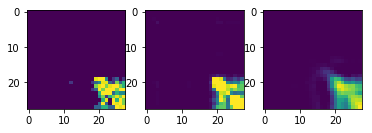

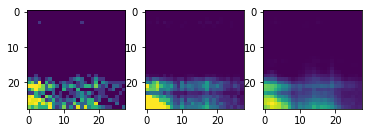

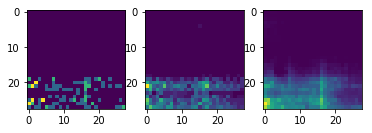

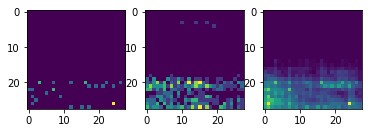

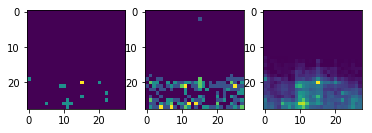

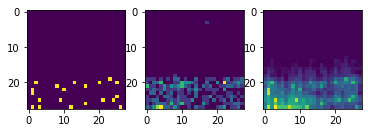

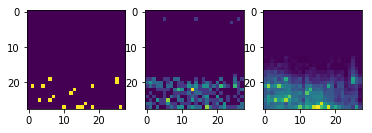

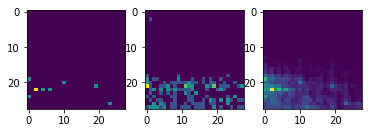

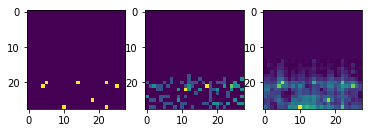

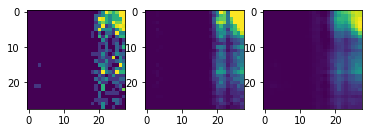

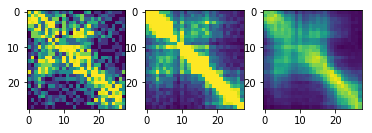

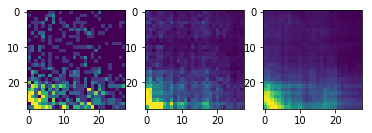

In [6]:
low_resolution_samples = np.load(gzip.GzipFile('HiCPlus/data/GM12878_replicate_down16_chr19_22.npy.gz', "r")).astype(np.float32) * down_sample_ratio

low_resolution_samples = np.minimum(HiC_max_value, low_resolution_samples)

batch_size = low_resolution_samples.shape[0]

# Reshape the high-quality Hi-C sample as the target value of the training. 
sample_size = low_resolution_samples.shape[-1]
padding = conv2d1_filters_size + conv2d2_filters_size + conv2d3_filters_size - 3
half_padding = int(padding / 2)
output_length = sample_size - padding


print(low_resolution_samples.shape)

lowres_set = data.TensorDataset(torch.from_numpy(low_resolution_samples), torch.from_numpy(np.zeros(low_resolution_samples.shape[0])))
lowres_loader = torch.utils.data.DataLoader(lowres_set, batch_size=batch_size, shuffle=False)

production = False
try:
    high_resolution_samples = np.load(gzip.GzipFile('HiCPlus/data/GM12878_replicate_original_chr19_22.npy.gz', "r")).astype(np.float32)
    high_resolution_samples = np.minimum(HiC_max_value, high_resolution_samples)
    Y = []
    for i in range(high_resolution_samples.shape[0]):
        no_padding_sample = high_resolution_samples[i][0][half_padding:(sample_size-half_padding) , half_padding:(sample_size - half_padding)]
        Y.append(no_padding_sample)
    Y = np.array(Y).astype(np.float32)
    hires_set = data.TensorDataset(torch.from_numpy(Y), torch.from_numpy(np.zeros(Y.shape[0])))
    hires_loader = torch.utils.data.DataLoader(hires_set, batch_size=batch_size, shuffle=False)
except:
    production = True
    hires_loader = lowres_loader

Net = model.Net(40, 28)
Net.load_state_dict(torch.load('model/pytorch_HindIII_model_99900', map_location=lambda storage, loc: storage))
#torch.load('modelparameters.pth', map_location=lambda storage, loc: storage)
if use_gpu:
    Net = Net.cuda()

_loss = nn.MSELoss()


running_loss = 0.0
running_loss_validate = 0.0
reg_loss = 0.0


for i, (v1, v2) in enumerate(zip(lowres_loader, hires_loader)):    
    _lowRes, _ = v1
    _highRes, _ = v2
    if i > 10:
        break

    _lowRes = Variable(_lowRes)
    _highRes = Variable(_highRes)
    _highRes = _highRes.reshape((14689, 1, 28, 28))
    
    if use_gpu:
        _lowRes = _lowRes.cuda()
        _highRes = _highRes.cuda()
    y_prediction = Net(_lowRes)
    if (not production):
        loss = _loss(y_prediction, _highRes) 


    running_loss += loss.data[0]
    
print('-------', i, running_loss, strftime("%Y-%m-%d %H:%M:%S", gmtime()))


y_prediction = y_prediction.data.cpu().numpy()




(14689, 1, 28, 28)


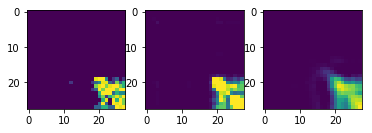

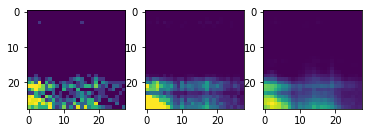

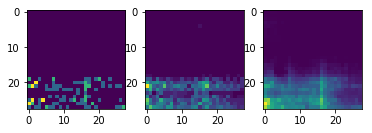

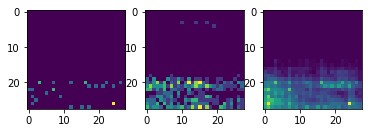

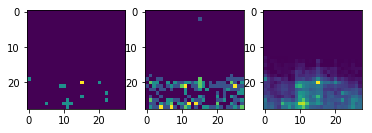

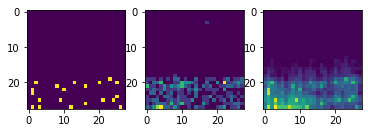

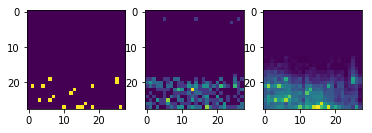

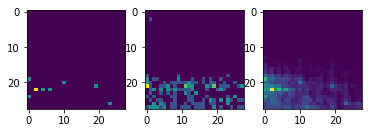

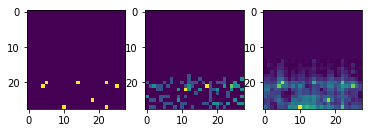

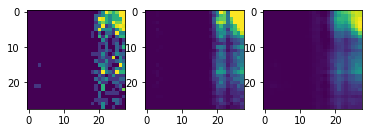

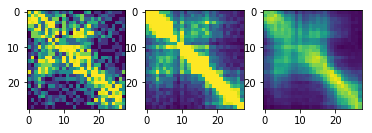

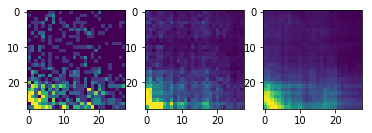

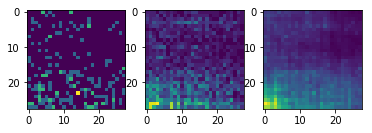

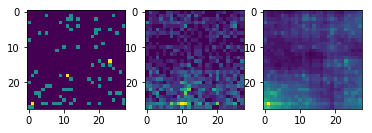

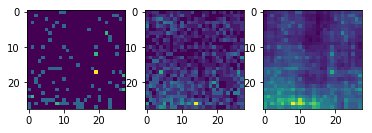

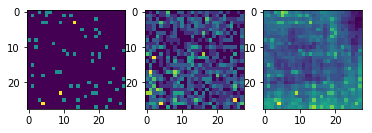

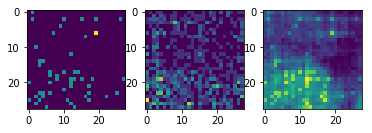

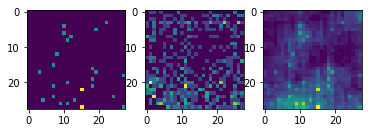

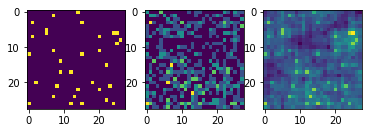

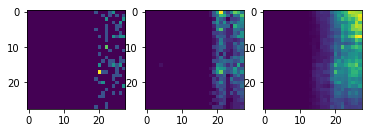

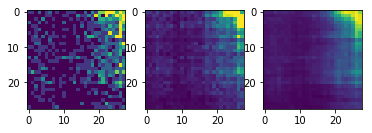

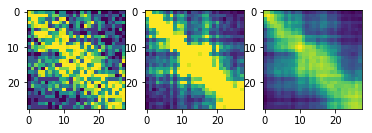

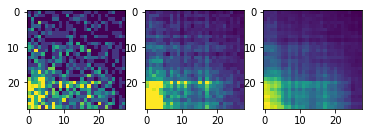

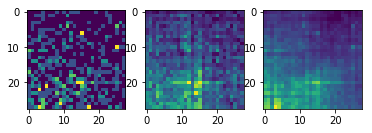

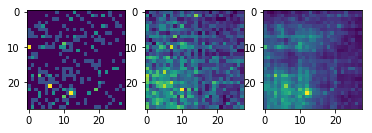

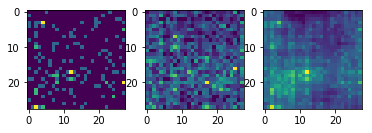

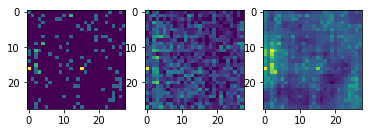

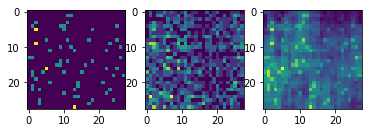

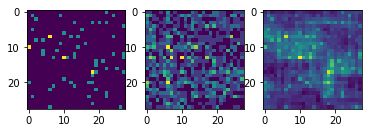

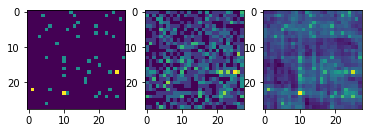

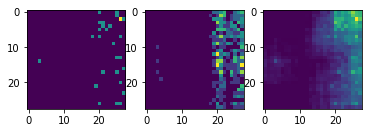

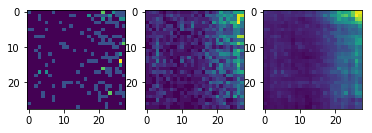

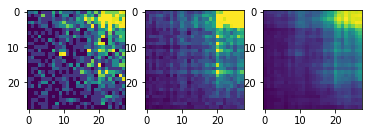

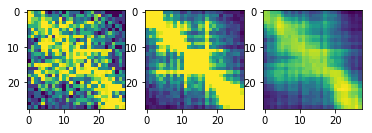

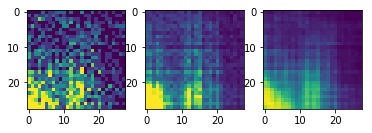

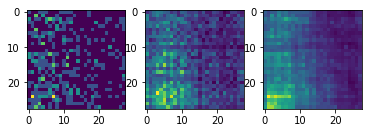

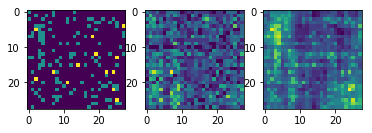

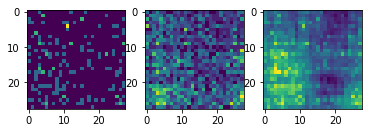

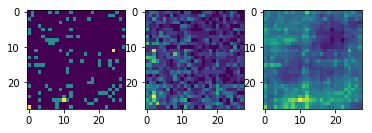

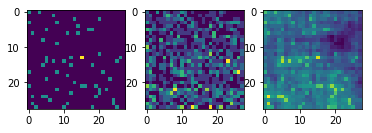

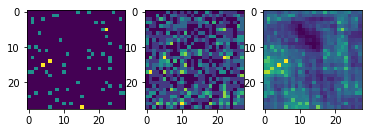

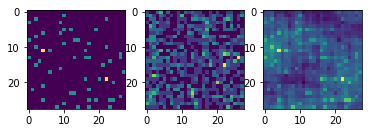

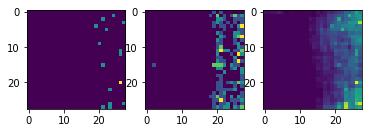

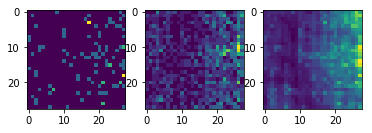

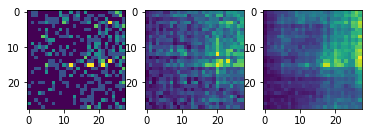

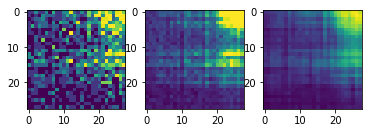

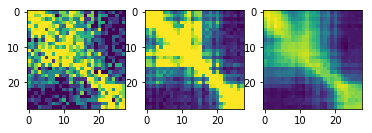

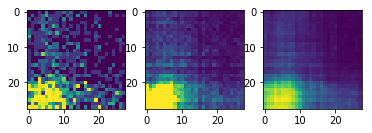

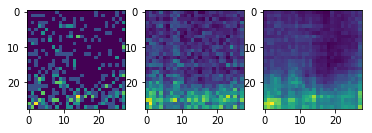

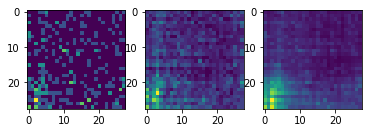

In [7]:
print(y_prediction.shape)
for i in range(50):
    tmp = y_prediction[i].reshape((28, 28))
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(low_resolution_samples[i][0][half_padding:(sample_size-half_padding) , half_padding:(sample_size - half_padding)], interpolation='nearest')
    plt.subplot(1,3,2)
    plt.imshow(high_resolution_samples[i][0][half_padding:(sample_size-half_padding) , half_padding:(sample_size - half_padding)], interpolation='nearest')
    plt.subplot(1,3,3)
    plt.imshow(tmp, interpolation='nearest')
    plt.show()

In [10]:
y_predict = y_prediction


print(y_predict.shape)

# recombine samples

length = int(y_predict.shape[2])
y_predict = np.reshape(y_predict, (y_predict.shape[0], length, length))


chrs_length = [249250621,243199373,198022430,191154276,180915260,171115067,159138663,146364022,141213431,135534747,135006516,133851895,115169878,107349540,102531392,90354753,81195210,78077248,59128983,63025520,48129895,51304566]

chrN = 21

length = int(chrs_length[chrN-1]/10000)

prediction_1 = np.zeros((length, length))


print('predicted sample: ', y_predict.shape, '; index shape is: ', index.shape)
#print index
for i in range(0, y_predict.shape[0]):          
    if (int(index[i][1]) != chrN):
        continue
#print index[i]
x = int(index[i][2])
y = int(index[i][3])
#print np.count_nonzero(y_predict[i])
prediction_1[x+6:x+34, y+6:y+34] = y_predict[i]



(14689, 1, 28, 28)


NameError: name 'index' is not defined